In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Student Score Data.csv',encoding='unicode_escape')

In [16]:
df.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(30641, 9)

In [6]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [19]:
df[['Gender','TestPrep','MathScore']].head(5)

,Gender,TestPrep,MathScore
0,female,none,72
1,female,completed,69
2,female,none,90
3,male,none,47
4,male,none,76


In [24]:
pd.isnull(df).sum()

Unnamed: 0      0
Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,66.749355,69.624980,68.468327
std,288.747894,15.206049,14.671572,15.307814
min,0.000000,0.000000,10.000000,5.000000
25%,249.000000,56.000000,60.000000,58.000000
50%,500.000000,67.000000,70.000000,69.000000
75%,750.000000,78.000000,80.000000,79.000000
max,999.000000,100.000000,100.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


In [8]:
df.isnull().sum()

Unnamed: 0      0
Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [9]:
df=df.drop("Unnamed: 0", axis = 1)

In [10]:
df.head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Gender Distribution 

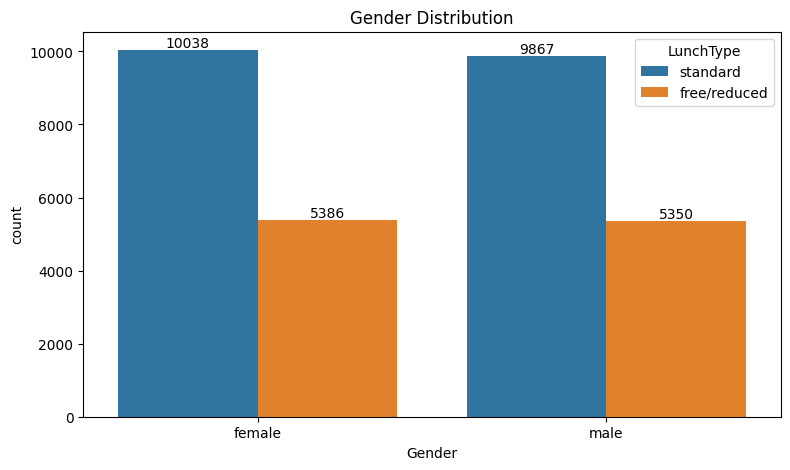

In [29]:
# used to set the dimension of the graph and give name to the graph
plt.figure(figsize=(9,5))
plt.title('Gender Distribution')


# used to make a graph of the given column without the actual number(i.e. just a picture representation)
# hue is added to breakdown the summation by gropus(i.e. bifercate the result even further)
mygraph= sns.countplot(data=df, x="Gender", hue ="LunchType")

# used to get the actual values on top of each bars in the graph for better analysis
for bars in mygraph.containers:
    mygraph.bar_label(bars)


# Parents education Distribution 

In [34]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [46]:
gp =df.groupby('ParentEduc')[['MathScore']].mean()
print(gp)

                    MathScore
ParentEduc                   
associate's degree  68.527787
bachelor's degree   70.635000
high school         64.670038
master's degree     72.168137
some college        66.603434
some high school    62.926359


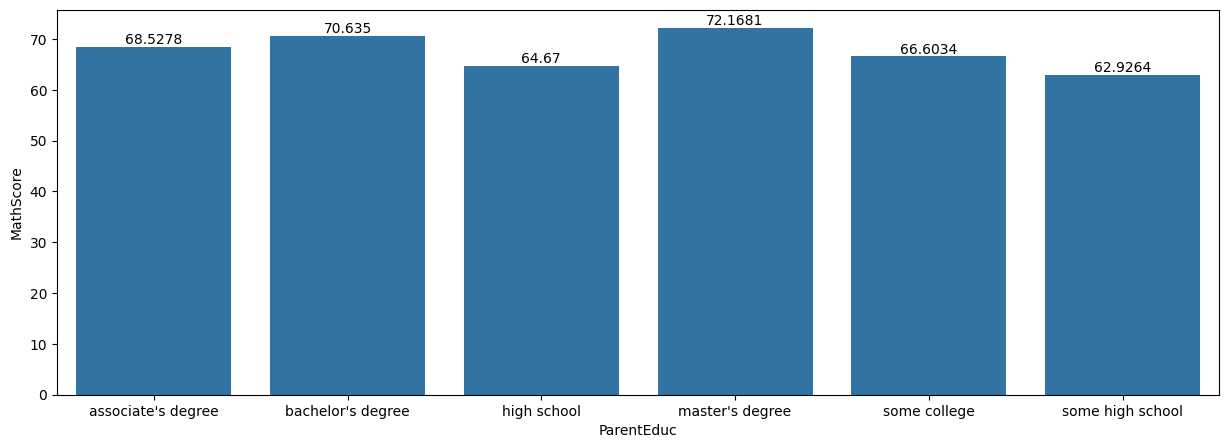

In [56]:
plt.figure(figsize=(15,5))
mm = sns.barplot(data=gp,x='ParentEduc', y='MathScore')

for bars in mm.containers:
    mm.bar_label(bars)
    

In [27]:
gp = df.groupby('ParentEduc', as_index=False)['MathScore'].sum()
print(gp)

           ParentEduc  MathScore
0  associate's degree     404451
1   bachelor's degree     254286
2         high school     390025
3     master's degree     155378
4        some college     469421
5    some high school     371706


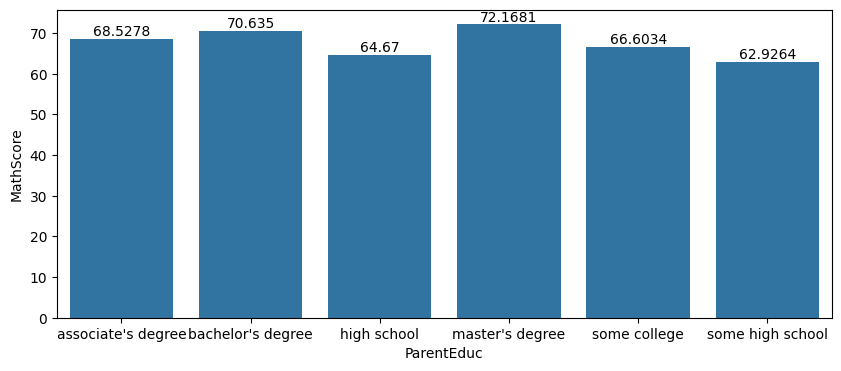

In [14]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x='ParentEduc', y='MathScore', data=gp)

for bars in ax.containers:
    ax.bar_label(bars)

In [39]:
gp = df.groupby('ParentEduc').agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})


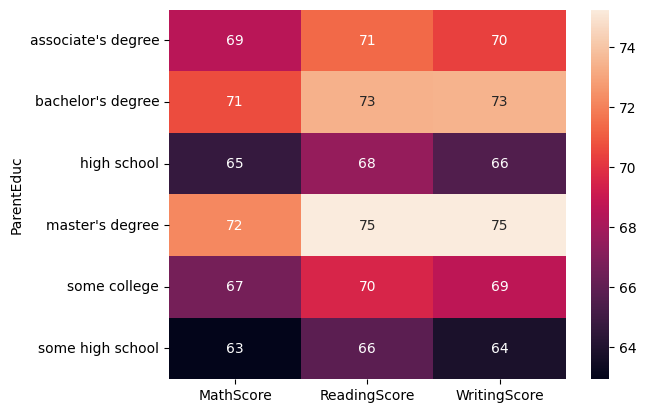

In [40]:
sns.heatmap(gp, annot=True)
plt.show()

In [ ]:
## Analysis :- parents that have masters degree their children performs better than some high school parents

# Ethnic Group Distribution 

In [19]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

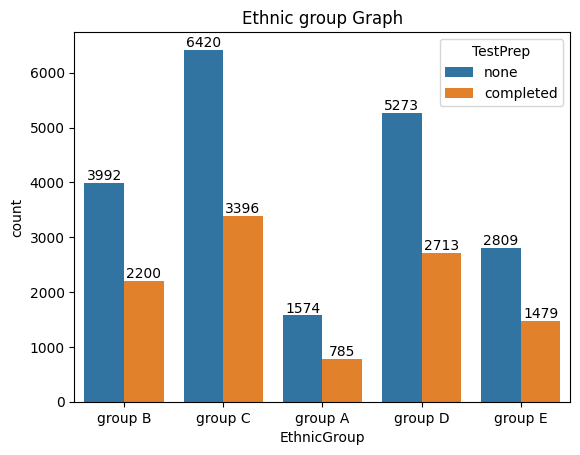

In [42]:
plt.title('Ethnic group Graph')
mp = sns.countplot(data=df, x='EthnicGroup', hue='TestPrep')

for bars in mp.containers:
    mp.bar_label(bars)

In [ ]:
## Most kids are from Ethinic group C and have also completed all the test whereas the Ethinic group A have the least kids and have
## completed the least test

# BoxPlot chart

In [ ]:
# Boxplot is used to find the outlier in a numeric column i.e. any value that does not show regular pattern

In [32]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

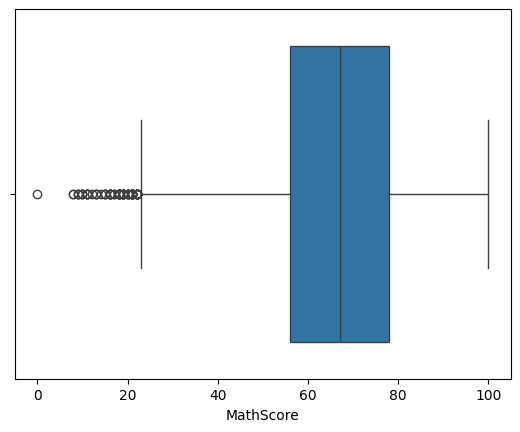

In [45]:
bp = sns.boxplot(data = df, x='MathScore')



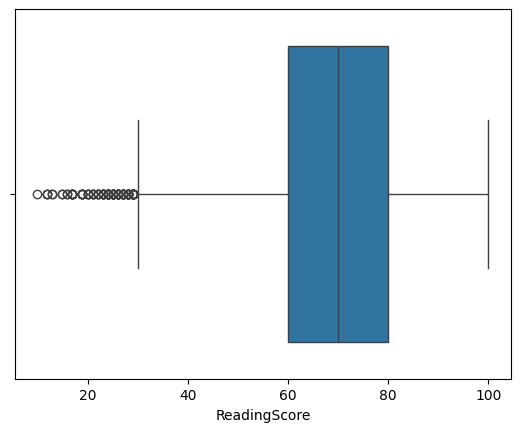

In [13]:
bp = sns.boxplot(data = df, x='ReadingScore')

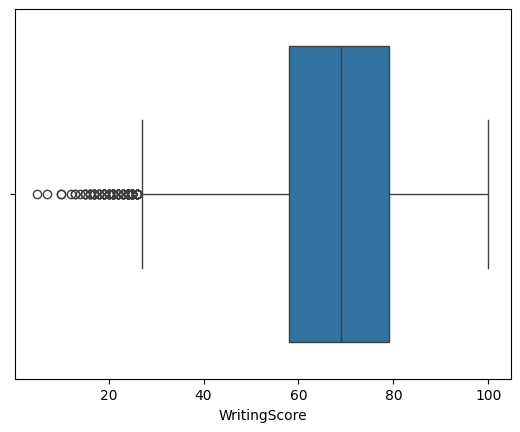

In [14]:
bp = sns.boxplot(data = df, x='WritingScore')

In [ ]:
## outlier is a kid that got 0 marks in maths

# Pie chart

In [46]:
# Pie chart is used to when we need to find distribution in percentage

In [53]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [56]:
df['EthnicGroup'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

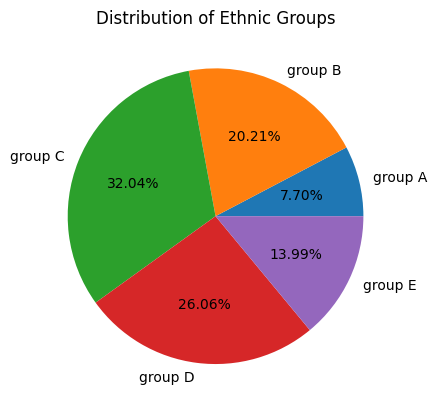

In [11]:
groupA = df.loc[(df['EthnicGroup']=='group A')].count()
groupB = df.loc[(df['EthnicGroup']=='group B')].count()
groupC = df.loc[(df['EthnicGroup']=='group C')].count()
groupD = df.loc[(df['EthnicGroup']=='group D')].count()
groupE = df.loc[(df['EthnicGroup']=='group E')].count()

mylist = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
mylabel  = ["group A","group B","group C","group D","group E"]
plt.pie(mylist, labels=mylabel, autopct="%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

# print(groupA)
# print(groupB)
# print(groupC)
# print(groupD)
# print(groupE)


# Conclusion / Analysis

In [ ]:
# In conclusion :-
# we can say that both male and female are getting more standard meal as compared to free meals.
# Students whose parents have master and bachelors degree have scored more marks when compared with other parents qualification
# Most kids are from Ethinic group C and have also completed all the test whereas the Ethinic group A have the least kids and have completed the least test
# There is a kid who got 0 marks in maths
# Ethnic group C have most people followed by group D and B